In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel('/content/drive/MyDrive/QIS/lab4_data.xlsx')


/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Problem 4.1 Clean Up

In [5]:
data.head()

,Name,Ticker,Exchange,E/P - Daily 2004-12-31,Daily Closing Price 2004-12-31 USD,Market Cap - Monthly 2004-12,BE/ME - Monthly 2004-12,One-Year Momentum 2004,Yearly Return Year 2005,FF Industry
0,"1-800 Contacts, Inc.",CTAC,NASDAQ,-0.010000,22.00000,292349046.0,0.200118,-0.032151,-0.468182,43.0
1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,554979079.0,0.343893,-0.293015,-0.235714,43.0
2,"1st Century Bancshrs, Inc.",FCTY,NASDAQ,NaN,7.87500,83160000.0,NaN,0.471962,0.231746,45.0
3,1st Constitution Bancorp,FCCY,NASDAQ,0.059784,12.34952,58586591.0,0.457281,0.338723,0.211209,45.0
4,"1st Independence Financial Group, Inc.",FIFG,NASDAQ,-0.044257,18.98000,36315724.0,1.038282,-0.135089,-0.004630,45.0


In [6]:
data.shape

(8870, 10)

In [7]:
data = data.dropna()
data.shape

(4885, 10)

In [8]:
data = data.rename(columns = {'E/P - Daily 2004-12-31': 'E/P', 'Daily Closing Price 2004-12-31 USD': 
                              'Closing', 'Market Cap - Monthly 2004-12': 'Cap', 'BE/ME - Monthly 2004-12': 'BEME',
                              'One-Year Momentum 2004':'Y_Momentum', 'Yearly Return Year 2005': 'Y_Return',
                              'FF Industry': 'Industry'})

In [9]:
data.head()

,Name,Ticker,Exchange,E/P,Closing,Cap,BEME,Y_Momentum,Y_Return,Industry
0,"1-800 Contacts, Inc.",CTAC,NASDAQ,-0.010000,22.00000,292349046.0,0.200118,-0.032151,-0.468182,43.0
1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,554979079.0,0.343893,-0.293015,-0.235714,43.0
3,1st Constitution Bancorp,FCCY,NASDAQ,0.059784,12.34952,58586591.0,0.457281,0.338723,0.211209,45.0
4,"1st Independence Financial Group, Inc.",FIFG,NASDAQ,-0.044257,18.98000,36315724.0,1.038282,-0.135089,-0.004630,45.0
7,1st Source Corporation,SRCE,NASDAQ,0.042340,23.19091,528712767.0,0.617725,0.205520,0.006680,45.0


# Problem 4.2 Outliers and Filtration

In [10]:
def is_out(x):
    return abs(x - x.mean()) > x.std() * 3

In [11]:
out = data[['E/P','Closing','Cap','BEME','Y_Momentum']]

#creating boolean df
outA = out.apply(is_out)

print('Outlier Boolean DF')
print(outA.head(2))
print('-------------')

print('Total Outliers')
print(outA.apply(sum))
print('-------------')
#creating boolean index
outB = outA.any(axis = 1)

print('Boolean Index')
print(outB.head(2))
print('-------------')
#remove all outliers
df = data[~outB]

print("Before and After Shapes")
print(data.shape)
print(df.shape)

#reseting index
df.reset_index(inplace = True, drop = True)
df.head(3)

Outlier Boolean DF
     E/P  Closing    Cap   BEME  Y_Momentum
0  False    False  False  False       False
1  False    False  False  False       False
-------------
Total Outliers
E/P            4
Closing        1
Cap           78
BEME          11
Y_Momentum    61
dtype: int64
-------------
Boolean Index
0    False
1    False
dtype: bool
-------------
Before and After Shapes
(4885, 10)
(4730, 10)


,Name,Ticker,Exchange,E/P,Closing,Cap,BEME,Y_Momentum,Y_Return,Industry
0,"1-800 Contacts, Inc.",CTAC,NASDAQ,-0.010000,22.00000,292349046.0,0.200118,-0.032151,-0.468182,43.0
1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,554979079.0,0.343893,-0.293015,-0.235714,43.0
2,1st Constitution Bancorp,FCCY,NASDAQ,0.059784,12.34952,58586591.0,0.457281,0.338723,0.211209,45.0


In [12]:
df.shape

(4730, 10)

In [13]:
data_f = df[(df['E/P'] >0) &(df['Closing'] >5)& (df['Cap'] > 100000000)&(df['BEME'] >0)]
data_f.shape

(2930, 10)

# Problem 4.3 Logarithm Variable

In [14]:
data_f['lnSize'] = np.log(df['Cap'])
data_f.head()

<ipython-input-14-b60d278c6945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['lnSize'] = np.log(df['Cap'])


,Name,Ticker,Exchange,E/P,Closing,Cap,BEME,Y_Momentum,Y_Return,Industry,lnSize
1,"1-800 Flowers.com, Inc.",FLWS,NASDAQ,0.076190,8.40000,5.549791e+08,0.343893,-0.293015,-0.235714,43.0,20.134441
4,1st Source Corporation,SRCE,NASDAQ,0.042340,23.19091,5.287128e+08,0.617725,0.205520,0.006680,45.0,20.085956
6,21st Century Insurance Group,TW,"NEW YORK STOCK EXCHANGE, INC.",0.072794,13.60000,1.162532e+09,0.666132,-0.067387,0.202298,34.0,20.873866
10,"51job, Inc. ADR",JOBS,NASDAQ,0.003487,51.97000,1.445199e+09,0.071201,0.715181,-0.717144,34.0,21.091513
11,"7-Eleven, Inc.",SE,"NEW YORK STOCK EXCHANGE, INC.",0.037996,23.95000,2.704339e+09,0.171745,0.439024,0.564509,31.0,21.718123


# Problem 4.4 Scatter Plot and P-value Correlation

## Scatter Plots

In [15]:
data_var = data_f[['BEME','Y_Momentum', 'lnSize', "Y_Return" ]]
data_var.head()

,BEME,Y_Momentum,lnSize,Y_Return
1,0.343893,-0.293015,20.134441,-0.235714
4,0.617725,0.205520,20.085956,0.006680
6,0.666132,-0.067387,20.873866,0.202298
10,0.071201,0.715181,21.091513,-0.717144
11,0.171745,0.439024,21.718123,0.564509


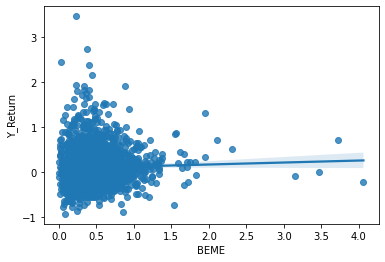

In [16]:
sns.regplot(x = "BEME",
            y = "Y_Return",
            data = data_var)
# show the plot
plt.show()

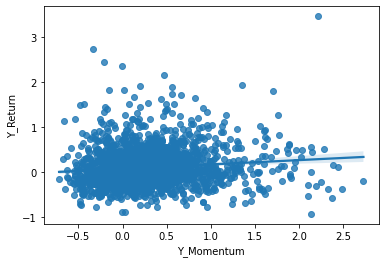

In [17]:
sns.regplot(x = "Y_Momentum",
            y = "Y_Return",
            data = data_var)
# show the plot
plt.show()

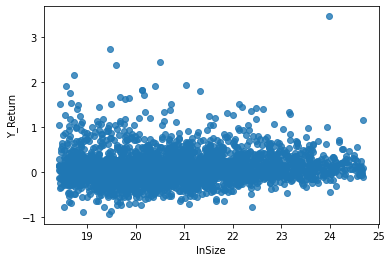

In [18]:
sns.regplot(x = "lnSize",
            y = "Y_Return",
            data = data_var)
# show the plot
plt.show()

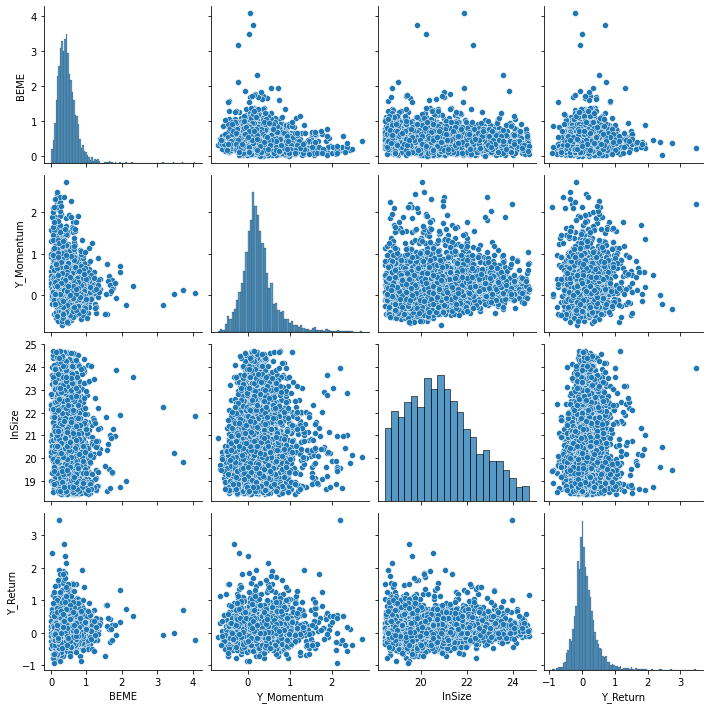

In [19]:
sns.pairplot(data_var)

## Correlations

In [20]:
corr = data_var.corr()
corr

,BEME,Y_Momentum,lnSize,Y_Return
BEME,1.000000,-0.158737,-0.138017,0.034492
Y_Momentum,-0.158737,1.000000,0.041033,0.112783
lnSize,-0.138017,0.041033,1.000000,0.073262
Y_Return,0.034492,0.112783,0.073262,1.000000


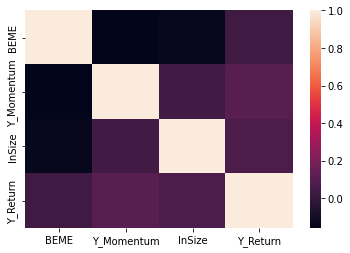

In [21]:
sns.heatmap(corr)

In [22]:
from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [23]:
corr_pval = data_var.corr(method=pearsonr_pval)
round(corr_pval,5)

,BEME,Y_Momentum,lnSize,Y_Return
BEME,1.00000,0.00000,0.00000,0.06193
Y_Momentum,0.00000,1.00000,0.02634,0.00000
lnSize,0.00000,0.02634,1.00000,0.00007
Y_Return,0.06193,0.00000,0.00007,1.00000


# Problem 4.5 Within Industry Z-score

## Z-score within Industry

In [24]:
data_exp = data_var.drop(columns = ['Y_Return'])
data_exp.head()

,BEME,Y_Momentum,lnSize
1,0.343893,-0.293015,20.134441
4,0.617725,0.205520,20.085956
6,0.666132,-0.067387,20.873866
10,0.071201,0.715181,21.091513
11,0.171745,0.439024,21.718123


In [25]:
from scipy.stats import zscore #scipy.stats has a zscore function
import scipy.stats as stats

In [26]:
df_z = data_f[['BEME','Y_Momentum','lnSize', 'Industry']]
df_z.head()

,BEME,Y_Momentum,lnSize,Industry
1,0.343893,-0.293015,20.134441,43.0
4,0.617725,0.205520,20.085956,45.0
6,0.666132,-0.067387,20.873866,34.0
10,0.071201,0.715181,21.091513,34.0
11,0.171745,0.439024,21.718123,31.0


In [27]:
len(df_z)

2930

In [28]:
df_zscore = df_z.groupby('Industry').apply(lambda x: stats.zscore(x))
df_zscore.head()

,BEME,Y_Momentum,lnSize,Industry
1,-0.356774,-1.149657,-0.645114,NaN
4,0.874090,-0.014588,-0.095234,NaN
6,1.196365,-0.684708,0.147636,NaN
10,-1.281006,1.132040,0.321364,NaN
11,-1.445351,0.835154,0.141680,NaN


In [29]:
df_zscore = df_zscore.drop(columns = ['Industry'])
df_zscore.head()

,BEME,Y_Momentum,lnSize
1,-0.356774,-1.149657,-0.645114
4,0.874090,-0.014588,-0.095234
6,1.196365,-0.684708,0.147636
10,-1.281006,1.132040,0.321364
11,-1.445351,0.835154,0.141680


In [30]:
df_zscore = df_zscore.rename(columns={"BEME": "zBEME", "Y_Momentum": "zMomentum", "lnSize": "zlnSize"})
df_zscore.head()

,zBEME,zMomentum,zlnSize
1,-0.356774,-1.149657,-0.645114
4,0.874090,-0.014588,-0.095234
6,1.196365,-0.684708,0.147636
10,-1.281006,1.132040,0.321364
11,-1.445351,0.835154,0.141680


In [31]:
final = pd.concat([data_var, df_zscore], axis = 1)
final.head()

,BEME,Y_Momentum,lnSize,Y_Return,zBEME,zMomentum,zlnSize
1,0.343893,-0.293015,20.134441,-0.235714,-0.356774,-1.149657,-0.645114
4,0.617725,0.205520,20.085956,0.006680,0.874090,-0.014588,-0.095234
6,0.666132,-0.067387,20.873866,0.202298,1.196365,-0.684708,0.147636
10,0.071201,0.715181,21.091513,-0.717144,-1.281006,1.132040,0.321364
11,0.171745,0.439024,21.718123,0.564509,-1.445351,0.835154,0.141680


## Regression

In [32]:
import statsmodels.api as sm

result = sm.OLS(endog = final["Y_Return"], exog = sm.add_constant(final[['zBEME','zMomentum',	'zlnSize']])).fit().summary()

result

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y_Return   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.136
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           8.97e-05
Time:                        19:26:41   Log-Likelihood:                -1104.4
No. Observations:                2930   AIC:                             2217.
Df Residuals:                    2926   BIC:                             2241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1030      0.007     15.796      0.000       0.090       0.116
zBEME          0.0197      0.007      2.871      0.004       0.006       0.033
zMomentum      0.0237      0.007      3.537      0.000       0.011       0.037
zlnSize        0.0174      0.007      2.609      0.009       0.004       0.030
==============================================================================
Omnibus:                     1192.799   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9065.227
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                      10.880   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Problem 4.6 Interpretation

Adjusted R^2: 0.006 or 0.6%. The model is not fitting the data well.
All variables have a p_value below 0.05 and so are significant a that level.

# Problem 4.7 Unrestricted and Restricted

## Unrestricted Model

In [33]:
import statsmodels.api as sm
Y = final["Y_Return"]
X = final[['zBEME','zMomentum',	'zlnSize']]
X_const = sm.add_constant(X)
model = sm.OLS(Y,X_const)
r_u = model.fit()
r_u.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y_Return   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.136
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           8.97e-05
Time:                        19:26:41   Log-Likelihood:                -1104.4
No. Observations:                2930   AIC:                             2217.
Df Residuals:                    2926   BIC:                             2241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1030      0.007     15.796      0.000       0.090       0.116
zBEME          0.0197      0.007      2.871      0.004       0.006       0.033
zMomentum      0.0237      0.007      3.537      0.000       0.011       0.037
zlnSize        0.0174      0.007      2.609      0.009       0.004       0.030
==============================================================================
Omnibus:                     1192.799   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9065.227
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                      10.880   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
resid_u = sum(r_u.resid**2)
resid_u

364.5681839022638

## Restricted Model

In [35]:
Y = final["Y_Return"]
X = final[['zMomentum']]
X_const = sm.add_constant(X)
model = sm.OLS(Y,X_const)
r_r = model.fit()
r_r.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y_Return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.928
Date:                Tue, 21 Feb 2023   Prob (F-statistic):            0.00283
Time:                        19:26:41   Log-Likelihood:                -1110.6
No. Observations:                2930   AIC:                             2225.
Df Residuals:                    2928   BIC:                             2237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1030      0.007     15.768      0.000       0.090       0.116
zMomentum      0.0195      0.007      2.988      0.003       0.007       0.032
==============================================================================
Omnibus:                     1163.437   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8705.919
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                      10.733   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
resid_r = sum(r_r.resid**2)
resid_r

366.119299782035

### F stats

In [37]:
f_stat = ((resid_r-resid_u)/resid_u)*((2930-3-1)/2)
f_stat

6.224576450460735

In [38]:
f_critical = stats.f.ppf(0.95, 2, 2930)
f_critical

2.998797301592456

In [39]:
p_val = stats.f.sf(f_stat, 2, 2930)
p_val

0.002006446325605991

#Problem 4.8

In [43]:
r_u.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Y_Return   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.136
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           8.97e-05
Time:                        19:35:19   Log-Likelihood:                -1104.4
No. Observations:                2930   AIC:                             2217.
Df Residuals:                    2926   BIC:                             2241.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1030      0.007     15.796      0.000       0.090       0.116
zBEME          0.0197      0.007      2.871      0.004       0.006       0.033
zMomentum      0.0237      0.007      3.537      0.000       0.011       0.037
zlnSize        0.0174      0.007      2.609      0.009       0.004       0.030
==============================================================================
Omnibus:                     1192.799   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9065.227
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                      10.880   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see in the result of our unrestricted model, all variables have a p-value below the 0.05 threshold, and a t-stat all above the 95% threshold (1.96). We can say from our findings that all variables are significant.

# Problem 4.9

In [40]:
r_u.params

const        0.103010
zBEME        0.019692
zMomentum    0.023727
zlnSize      0.017406
dtype: float64

The coefficients we are seeing are positive, meaning that they effect yearly returns positively. When it comes to the economic meaning and interpretation, it makes sense that, within the magnitude we have as we are looking at zscore in relation to the yearly returns, zBEME and zMomentum make economic sense, but zlnSize might not make sense, as we have learned small cap may outperform and give better returns compared to big cap, due to the upside potential they may have.

# Problem 4.10 Test for heteroskedasticity

In [41]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(r_u.resid, r_u.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 29.43618148188787),
 ('p-value', 1.8132658618853906e-06),
 ('f-value', 9.89810629989946),
 ('f p-value', 1.7163097539622465e-06)]

We can see that the p_value is below 0.05 and so we can conclude that there is heteroskedasticity.

# Problem 4.11 Test for  the  presence  of  serial  correlation

In [42]:
#Durbin-Watson Test
import statsmodels.formula.api as smf
formula = 'Y_Return ~ zBEME + zMomentum + zlnSize'
results = smf.ols(formula, final).fit()
sms.stattools.durbin_watson(results.resid, axis=0)

2.0157919484505578

Since we have a 2.016, we can say that there is no presence of serial correlation.